In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [2]:
data = pd.read_csv('auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
data = data[data.ne('?').all(1)]

In [4]:
x = data.iloc[:,[1,2,3,4,5]]
y = data.iloc[:,[0]]
x['horsepower'] = x['horsepower'].astype('float64')
x.dtypes
x = x.values
y = y.values

<ipython-input-4-26e2bb9813a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['horsepower'] = x['horsepower'].astype('float64')


<ipython-input-5-7bb44f721ab8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['mpg'])


<Axes: xlabel='mpg', ylabel='Density'>

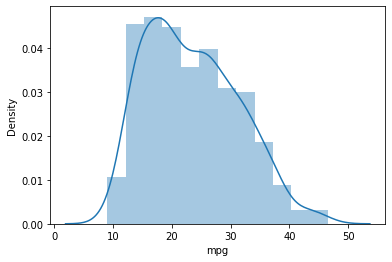

In [5]:
sns.distplot(data['mpg'])

<Axes: >

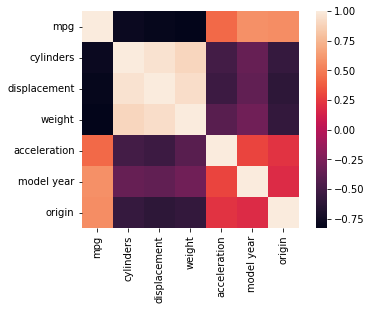

In [6]:
corrmat = data.corr()
f,ax = plt.subplots()
sns.heatmap(corrmat, square = True)

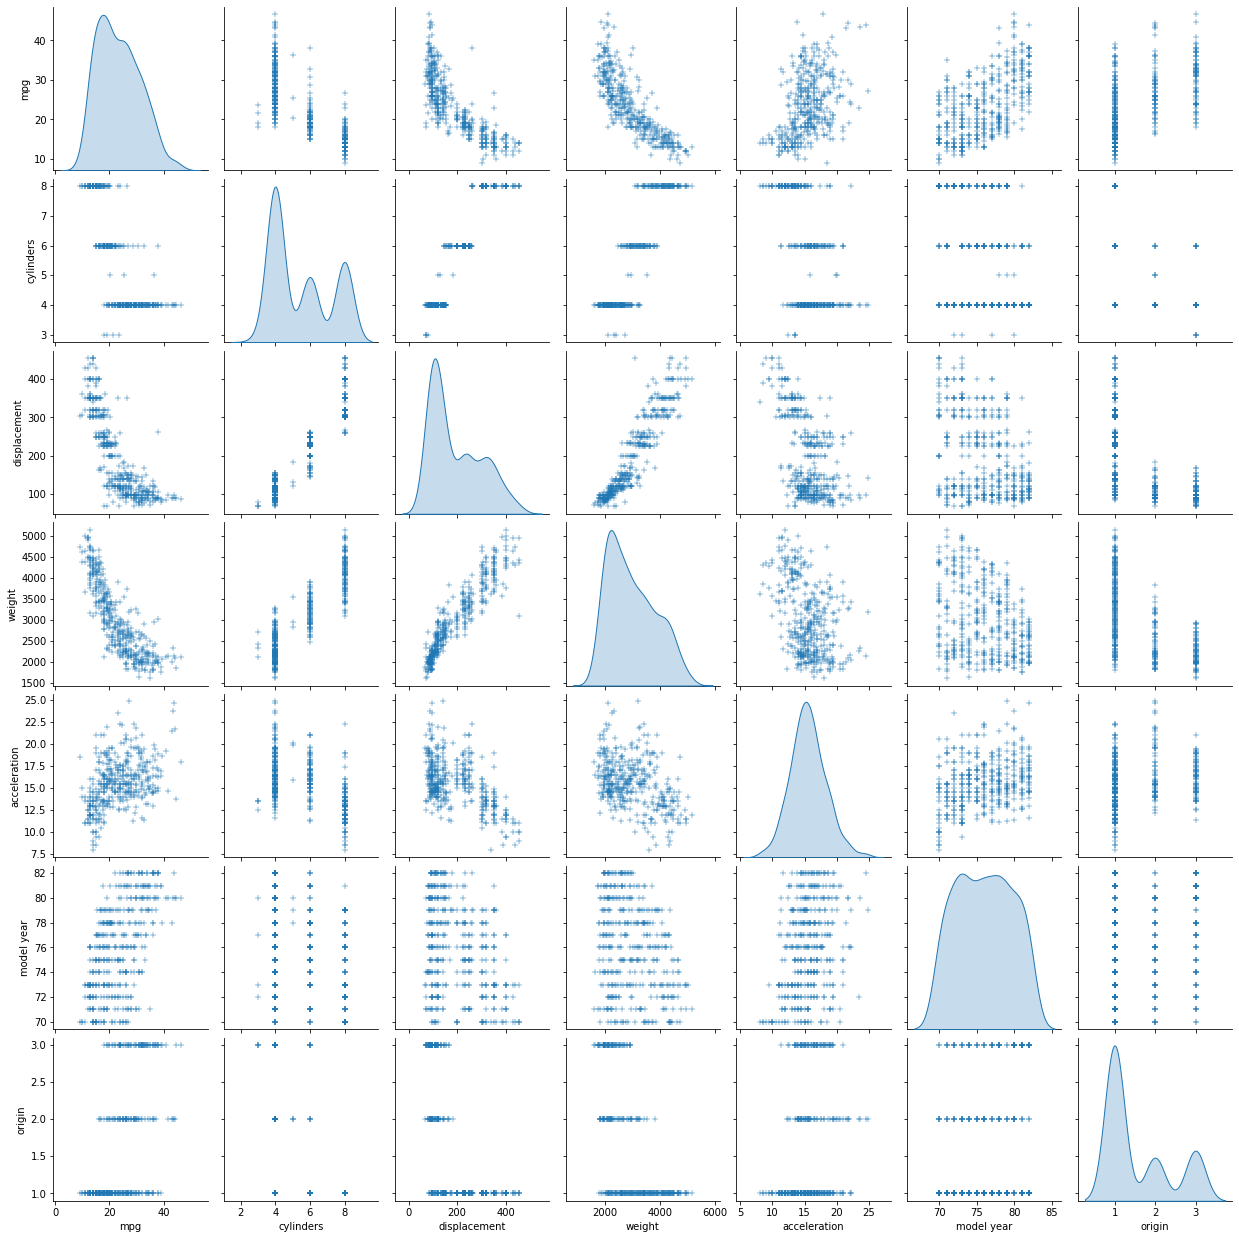

In [7]:
sns.pairplot(data, diag_kind = "kde", markers = "+")
plt.show()

In [8]:
# Split the dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(313, 5) (79, 5)
(313, 1) (79, 1)


In [9]:
# Input normalization
X_max = X_train.max(axis=0, keepdims=True)
X_min = X_train.min(axis=0, keepdims=True)
print(X_max.shape, X_min.shape)
print(X_max)
print(X_min)

(1, 5) (1, 5)
[[   8.   455.   230.  5140.    24.8]]
[[   3.   70.   46. 1613.    8.]]


In [10]:
X_train_scaled = (X_train - X_min)/(X_max - X_min)
print(X_train_scaled.min(), X_train_scaled.max())

0.0 1.0


In [11]:
X_test_scaled = (X_test - X_min)/(X_max - X_min)
print(X_test_scaled.min(), X_test_scaled.max())

-0.005194805194805195 1.0


In [12]:
# # Output normalization
# y_mean = y_train.mean(axis=0, keepdims=True)
# y_std=y_train.std(axis=0,keepdims=True)

# y_train_scaled = (y_train - y_mean) / y_std
# y_test_scaled = (y_test - y_mean) / y_std

# print(y_train_scaled.max(), y_train_scaled.min())
# print(y_test_scaled.max(), y_test_scaled.min())


In [13]:
# Output normalization
y_max = y_train.max(axis=0, keepdims=True)
y_min = y_train.min(axis=0, keepdims=True)
print(y_max.shape, y_min.shape)
print(y_max)
print(y_min)
y_train_scaled = (y_train - y_min)/(y_max - y_min)
print(y_train_scaled.min(), y_train_scaled.max())
y_test_scaled = (y_test - y_min)/(y_max - y_min)
print(y_test_scaled.min(), y_test_scaled.max())

(1, 1) (1, 1)
[[46.6]]
[[9.]]
0.0 1.0
0.026595744680851064 0.9308510638297872


In [14]:
# y_train_scaled = (y_train - y_min)/(y_max - y_min)
# print(y_train_scaled.min(), y_train_scaled.max())
# y_test_scaled = (y_test - y_min)/(y_max - y_min)
# print(y_test_scaled.min(), y_test_scaled.max())

In [15]:
# Predict model
def predict(X,w):
  y_pred = np.dot(X, w.T)
  return y_pred

# Loss function
def loss(X, y,w):
  y_pred = predict(X,w)
  return np.mean((y_pred-y)**2)

# Gradients
def grad(X,y,w):
  y_pred = predict(X,w)
  delta = y_pred-y
  dw = np.dot(X.T,delta)
  return dw.T

In [16]:
w = np.zeros((1,5))
l_rate = 0.001
epoch = 100000
l = loss(X_train_scaled, y_train_scaled, w)
print(f"Initial loss: ",l)
history = [l]
for i in range(epoch):
  l = loss(X_train_scaled, y_train_scaled, w)
  dw = grad(X_train_scaled, y_train_scaled, w)
  w -= l_rate*dw
  history.append(l)
print(f"Final loss: ",l)

Initial loss:  0.19539461171767544
Final loss:  0.025829164311901853


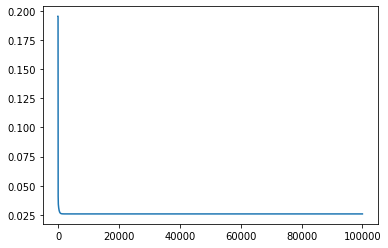

In [17]:
plt.plot(history)
plt.show()

In [18]:
import numpy as np

class LinearRegression:
    def __init__(self, lr=0.001, n_iters=10000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias to zero
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent for n_iters iterations
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

In [19]:
model = LinearRegression(lr=0.001, n_iters=10000)
model.fit(X_train_scaled, y_train_scaled.T[0,:])
y_pred = model.predict(X_test_scaled)

In [20]:
# def evaluation(y_test, y_pred):
#   # MAE
#   mae = np.sum(np.abs(y_pred - y_test))/y_test.shape[0]
#   print("mae = ",mae)
#   # MSE
#   mse = np.sum((y_pred - y_test)**2)/y_test.shape[0]
#   print("mse = ",mse)
#   # RMSE
#   rmse = np.sqrt(mse)
#   print("rmse = ",rmse)
#   # R2 score
#   sst = np.sum((y_test - y_test.mean())**2)
#   ssr = np.sum((y_pred - y_test)**2)
#   r2 = 1 - (ssr/sst)
#   print("r2 = ",r2)

In [21]:
# Mean squared error
def mean_squared_error(y_test, y_pred):
    sum_of_squared_errors = 0
    for i in range(len(y_test)):
        error = y_test[i] - y_pred[i]
        sum_of_squared_errors += error**2
    mse = sum_of_squared_errors / len(y_test)
    return mse

# Root mean squared error
def root_mean_squared_error(y_test, y_pred):
    return math.sqrt(mean_squared_error(y_test, y_pred))

# Mean absolute error
def mean_absolute_error(y_test, y_pred):
    absolute_errors = []
    for i in range(len(y_test)):
        error = abs(y_test[i] - y_pred[i])
        absolute_errors.append(error)
    mae = sum(absolute_errors) / len(y_test)
    return mae

# R2 Score
def r2_score(y_true, y_pred):
    ss_res = sum([(y_true[i] - y_pred[i])**2 for i in range(len(y_true))])
    ss_tot = sum([(y_true[i] - np.mean(y_true))**2 for i in range(len(y_true))])
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [22]:
mse = mean_squared_error(y_test_scaled, y_pred)
mae = mean_absolute_error(y_test_scaled, y_pred)
rmse = root_mean_squared_error(y_test_scaled, y_pred)
r2 = r2_score(y_test_scaled, y_pred)
print("MSE: {0}".format(mse))
print("MAE: {0}".format(mae))
print("RMSE: {0}".format(rmse))
print("R2: {0}".format(r2))

MSE: [0.01350575]
MAE: [0.08963276]
RMSE: 0.11621424964180029
R2: [0.62590765]


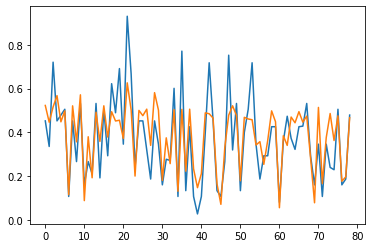

In [23]:
plt.plot(y_test_scaled)
plt.plot(y_pred)
plt.show()

In [24]:
bias = np.ones((X_train.shape[0],1))
X_train_scaled = np.hstack((bias,X_train_scaled))
bias = np.ones((X_test.shape[0],1))
X_test_scaled = np.hstack((bias,X_test_scaled))

In [25]:
w = np.zeros((1,6))
l_rate = 0.001
epoch = 10000
l = loss(X_train_scaled, y_train_scaled, w)
print(f"Initial loss: ",l)
history = [l]
for i in range(epoch):
  l = loss(X_train_scaled, y_train_scaled, w)
  dw = grad(X_train_scaled, y_train_scaled, w)
  w -= l_rate*dw
  history.append(l)
print(f"Final loss: ",l)

Initial loss:  0.19539461171767544
Final loss:  0.012646986604845692


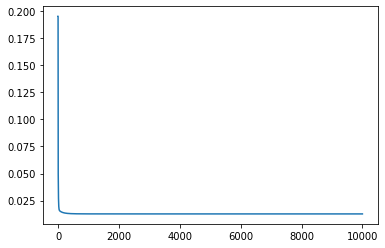

In [26]:
plt.plot(history)
plt.show()

In [27]:
model = LinearRegression(lr=0.001, n_iters=10000)
model.fit(X_train_scaled, y_train_scaled.T[0,:])
y_pred = model.predict(X_test_scaled)

In [28]:
mse = mean_squared_error(y_test_scaled, y_pred)
mae = mean_absolute_error(y_test_scaled, y_pred)
rmse = root_mean_squared_error(y_test_scaled, y_pred)
r2 = r2_score(y_test_scaled, y_pred)
print("MSE: {0}".format(mse))
print("MAE: {0}".format(mae))
print("RMSE: {0}".format(rmse))
print("R2: {0}".format(r2))

MSE: [0.0129221]
MAE: [0.0879989]
RMSE: 0.11367539971903129
R2: [0.64207417]


In [29]:
# Using Scikit Learn libraries to calculate errors

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

model = LinearRegression(fit_intercept=True)
model.fit(X_train_scaled, y_train_scaled)

# Evaluate the model on the test data
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
mae = mean_absolute_error(y_test_scaled, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test_scaled, y_pred)

# Print the evaluation metrics
print("Mean squared error: ", mse)
print("Mean absolute error: ", mae)
print("Root mean squared error: ", rmse)
print("R2 score: ", r2)

Mean squared error:  0.012688979725435192
Mean absolute error:  0.09271627136534018
Root mean squared error:  0.11264537152246955
R2 score:  0.6485312110889083


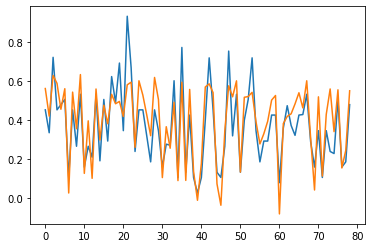

In [30]:
plt.plot(y_test_scaled)
plt.plot(y_pred)
plt.show()